In [4]:
import numpy as np

import matplotlib.pyplot as plt


In [5]:

# We have a half circle of 11  googly eyes that each have their angle determined by 
# theta(t) = theta_max*sin(wt + phase)+theta_initial
# the eyes move between pi and -pi, so theta_max is pi. I am going to assume that there is no initial
# phase because I don't have a good way of figuring that out
# Importantly the eyes all start pointing down and theta = 0 when all eyes are focused on the center 
# of the half circle. theta_initial for each googly eye ranges from -90 to 90 moving from right to 
# left, so that theta_initial is the ofset of each eye from the angle wehre it is looking at the center
# The starting angle should vary linearly with position from -90 to 90 where the the eye_1 = -90,
# eye_6 = 0 and eye_11 = 90.
# We can just draw a line

# the slope of this line is this (y is our initial angle and x is our position on the wall)
m = (90 - (-90))/(11-1)

# Slope intercept form of our line is y = mx + b, so y - mx = b gives us the slope. We will just use
# (11,90)
b = 90 - m*11

print(f'the slope of the line is {m} and the y-intercept is {b}')

# lets test this using our mid point, when x = 6, our angle should be 0
y_6 = m*6 + b
if y_6 == 0:
    print('the function works')
else:
    print(f'something is wrong. we got {y_6}')



the slope of the line is 18.0 and the y-intercept is -108.0
the function works


In [10]:
def start_angles(n):
    '''
    This function will take in the number of googly eyes in the display and give the starting angles
    as an array

    input:
        n: interger; number of googly eyes
    
    output:
        start_pos: n x 1 array: starting positions in radians
    '''
    # we are doing calculations in degrees because the conversion is easy and its just easier to type
    # the degrees
    m = (90 - (-90))/(n-1)
    b = 90 - m*n

    # now we can initialize the array
    #start_pos = np.zeros((n,1))
    x = np.asarray([i for i in range(1,n+1)])

    start_pos = m*x + b

    return start_pos*np.pi/180

In [11]:
init_angle = start_angles(11)
init_angle 

array([-1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
        0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633])

In [19]:
# we need to hard code an array for the rotation speed
rot_speed = [0.00525, -0.0004, 0.03328, -0.00837, -0.00302, -0.04033, -0.01632, -0.02697, 0.01205, 0.0214, 0.00142]
rot_speed = np.asarray(rot_speed)*2*np.pi
# as a note, I am assuming that the rotation speed is constant in one direction
rot_speed


array([ 0.03298672, -0.00251327,  0.20910441, -0.05259026, -0.01897522,
       -0.25340086, -0.10254158, -0.16945751,  0.07571238,  0.13446017,
        0.00892212])

In [37]:
# Function for Part A
def Plot_Focus(init_angle, rot_speed):
    '''
    This function will take in the initial angles and rotation speeds as a vector and return a plot
    of the focus of the of the googly eyes

    Inputs:
        init_angle: n x 1 array; initial angles of the eyes

        rot_speed: n x 1 array; rotation speeds of the eyes
    
    Outputs:
        Plot showing how the Focus changes
        Focus is defined as the sum of the variation in the angles. Focus is achieved when all angles
        are zero
    
    Note:
        for each eye
        theta(t) = pi*sin(w*t) + theta_initial
        Focus is
        Focus = sum(abs(theta(t)))
    '''
    # set up array of times
    times = np.arange(0,60*60,.5)
    focus = np.zeros(np.size(times))
    for i in range(np.size(times)):
        focus_temp = np.abs(np.pi*np.sin(rot_speed * times[i]) + init_angle)
        focus[i] = np.sum(focus_temp)
    
    fig = plt.figure(figsize = (4,6), dpi = 150)
    plt.plot(times/60/60, focus)
    plt.xlabel('Time (hr)')
    plt.ylabel('Focus')
    plt.title('Focus of Googly eyes over 1 hour')



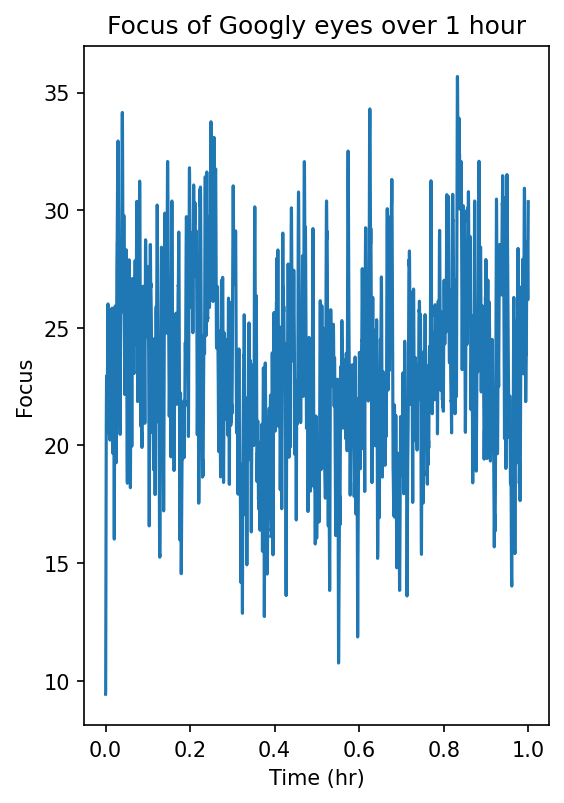

In [38]:
# Part A
Plot_Focus(init_angle, rot_speed)

In [27]:

# We can see from our rotation speeds and the plot above that the starting positions are all wrong.
# not only are they in the wrong positions, they shouldn't be evenly spaced across the arc.The starting
# position we want and the initial angle can be, in a sense thought of as a function of the rotation
# speed.

# as a function of angle rather the initial angle is going to be 

m = (90 - (-90))/(180-0)

b = 90 - m*180

print(f'init_angle = {m}*focal_angle + {b}')

init_angle = 1.0*focal_angle + -90.0


In [ ]:
# Now I can define a new version of my function in terms of the focal_angle_i which is the angle with
# resepect to the focal point of the i_th googly eye
# theta_i = -pi*sin(w_i*t)+m*focal_angle_i+b
# since minimizing abs function is a pain, I am going to minimize sum(theta_i**2). THe dimensions of 
# this are wrong, butthe result of the minimization should be nearly equivalent
# with respect to focal_angle_i the derivative of the sum(theta_i**2) should be
# grad = 2*m*sum(theta_i**2)
# doing our rough approximation of gradient descent, we should be doing
# focal_angle_i = focal_angle_i + alpha*grad
# where alpha is some small number, like .01

In [36]:
focal_angle_init = np.linspace(0,180,11, endpoint = True)
focal_angle_init

array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.])

In [ ]:
# Incomplete attempt at Part B
# The problem I am encountering with this gradient descent is that the problem isn't well defined. By
# this, I mean that the minimization is done with respect to the focal angle, but the time varies from
# 1 to 3600 seconds. I'm honestly not sure how to go about this...I guess I could minimize with respect
# to each time, but doing 3600 minimizations seems like a lot...

def grad_descent(focal_angle_init, rot_speed):
    pass